In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The dataset is a collection of song names with their features and artists

In [ ]:
music = pd.read_csv("music_genre.csv")

In [ ]:
music.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
music.describe

<bound method NDFrame.describe of        instance_id           artist_name                track_name  \
0          32894.0              Röyksopp      Röyksopp's Night Out   
1          46652.0  Thievery Corporation          The Shining Path   
2          30097.0        Dillon Francis                 Hurricane   
3          62177.0              Dubloadz                     Nitro   
4          24907.0           What So Not          Divide & Conquer   
...            ...                   ...                       ...   
50000      58878.0                 BEXEY                  GO GETTA   
50001      43557.0             Roy Woods       Drama (feat. Drake)   
50002      39767.0                Berner  Lovin' Me (feat. Smiggz)   
50003      57944.0             The-Dream         Shawty Is Da Shit   
50004      63470.0     Naughty By Nature            Hip Hop Hooray   

       popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652         -

The dataset is a collecton of 21194 rows and 18 columns

In [ ]:
music.shape

(50005, 18)

In [ ]:
music.columns     #  columns in the dataset

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

In [ ]:
music['music_genre'].unique()   # genres present in the dataset

array(['Electronic', 'Anime', nan, 'Jazz', 'Alternative', 'Country',
       'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

droping columns which are of no use in analysis

In [ ]:
music = music.drop(["instance_id"], axis=1)
music = music.drop(["artist_name"], axis=1)
music = music.drop(["track_name"], axis=1)
music = music.drop(["obtained_date"], axis=1)

In [ ]:
music.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'music_genre'],
      dtype='object')

data type of columns 

In [ ]:
music.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
valence             float64
music_genre          object
dtype: object

In [ ]:
music.head(10)["tempo"]  # here it contains ? so we'll remove it and changing its dtype to float

0               100.889
1    115.00200000000001
2               127.994
3               128.014
4               145.036
5                     ?
6               149.995
7               120.008
8    149.94799999999998
9               139.933
Name: tempo, dtype: object

In [ ]:
music = music.drop(music[music["tempo"] == "?"].index)
music["tempo"] = music["tempo"].astype("float")

In [ ]:
music['tempo'].head(10)

0     100.889
1     115.002
2     127.994
3     128.014
4     145.036
6     149.995
7     120.008
8     149.948
9     139.933
10     57.528
Name: tempo, dtype: float64

identifying null values and discarding them

In [ ]:
music[music.isnull().any(axis=1)]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
music = music.dropna()

In [ ]:
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


The 'key' and 'mode' columns do not have numerical values, so we wish to map them before using them

<Axes: xlabel='mode', ylabel='count'>

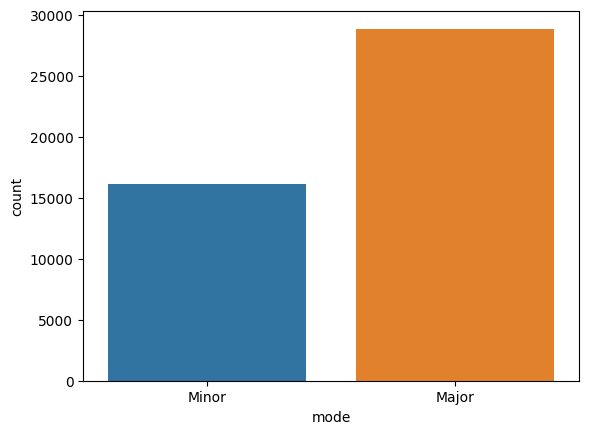

In [ ]:
sns.countplot(x="mode", data=music)  #creating a countplot of the 'mode' column 

In [ ]:
music["mode"] = music["mode"].map({"Minor": 0, "Major": 1})  # converting non-numerical data into numerical format

<Axes: xlabel='key', ylabel='count'>

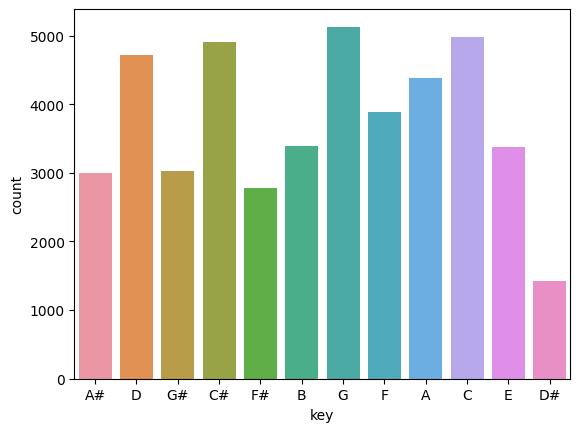

In [ ]:
sns.countplot(x="key", data=music)     # countplot for 'key'

mapping values

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def Label_enc(param):      # define a function to encode key values
    LabelE = LabelEncoder()    # creating new instance of class LabelEncoder
    LabelE.fit(param)          #  fitting the input to encoder
    print(param.name,LabelE.classes_)
    return LabelE.transform(param)      #   transform method of the LabelEncoder object to encode the input data, and returns the encoded data as a new pandas Series object.


In [ ]:
music["key"] = Label_enc(music["key"])   # encoding key column by passing as an input to Label_enc method

key ['A' 'A#' 'B' 'C' 'C#' 'D' 'D#' 'E' 'F' 'F#' 'G' 'G#']


In [ ]:
music.head(10)   # data is converted to a single datatype 

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.792000,1,0.1150,-5.201,0,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.950000,5,0.1240,-7.043,0,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.011800,11,0.5340,-4.617,1,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.002530,4,0.1570,-4.498,1,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.909000,9,0.1570,-6.266,1,0.0413,145.036,0.323,Electronic
6,46.0,0.02890,0.572,214408.0,0.803,0.000008,2,0.1060,-4.294,1,0.3510,149.995,0.230,Electronic
7,43.0,0.02970,0.809,416132.0,0.706,0.903000,10,0.0635,-9.339,0,0.0484,120.008,0.761,Electronic
8,39.0,0.00299,0.509,292800.0,0.921,0.000276,8,0.1780,-3.175,0,0.2680,149.948,0.273,Electronic
9,22.0,0.00934,0.578,204800.0,0.731,0.011200,0,0.1110,-7.091,0,0.1730,139.933,0.203,Electronic
10,30.0,0.85500,0.607,170463.0,0.158,0.000000,9,0.1060,-13.787,0,0.0345,57.528,0.307,Electronic


<Axes: xlabel='music_genre', ylabel='count'>

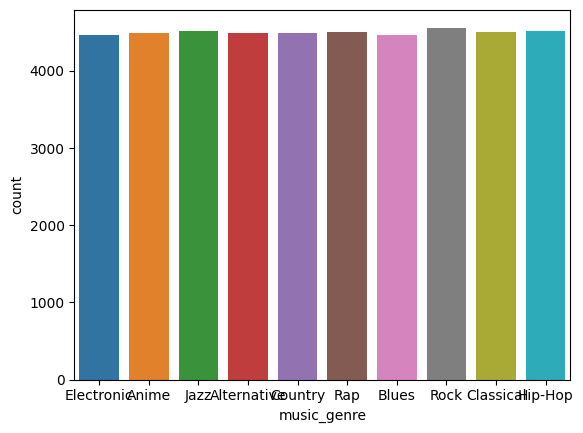

In [ ]:
sns.countplot(x="music_genre", data=music)    # countplot for music genre

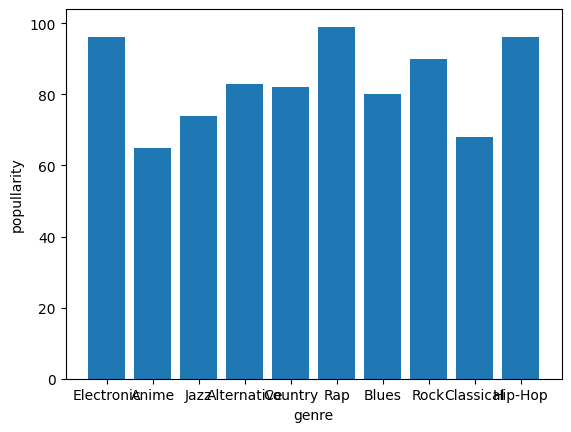

In [ ]:
plt.bar(music['music_genre'], music['popularity'])

# Add labels and title
plt.xlabel('genre')
plt.ylabel('popullarity')
plt.show()

plotting density plots

In [ ]:
# converting data into wide-format
data_wide = music.pivot(columns='music_genre',
                     values='danceability')
data_wide.head()

music_genre,Alternative,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,NaN,NaN,NaN,NaN,NaN,0.652,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.622,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,0.620,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.774,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.638,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Danceability')

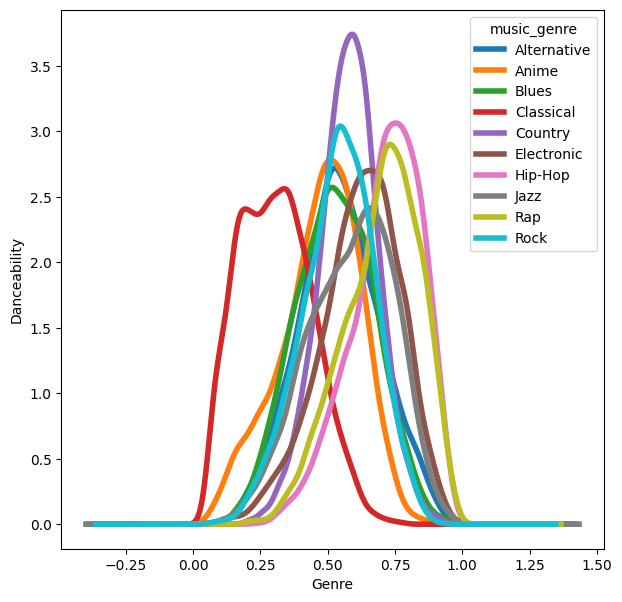

In [ ]:
data_wide.plot.density(figsize = (7, 7),
                       linewidth = 4)
  
plt.xlabel("Genre")
plt.ylabel("Danceability")


Text(0, 0.5, 'popularity')

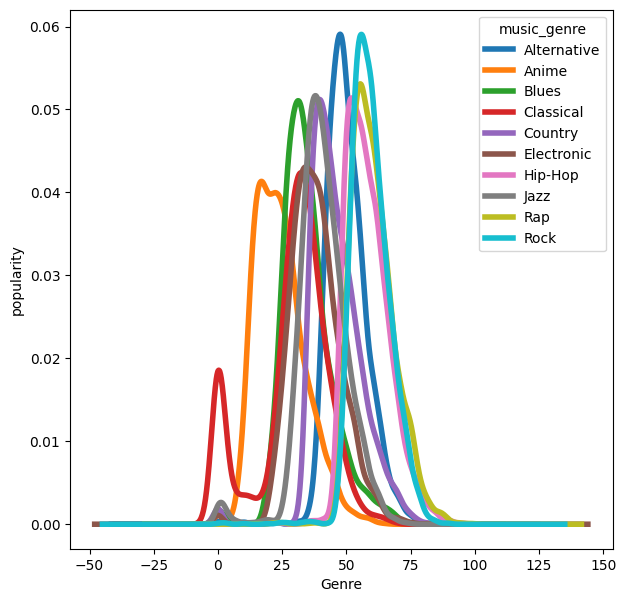

In [ ]:
# converting data into wide-format
data_wide = music.pivot(columns='music_genre',
                     values='popularity')
# plotting
data_wide.plot.density(figsize = (7, 7),
                       linewidth = 4)
  
plt.xlabel("Genre")
plt.ylabel("popularity")

Text(0, 0.5, 'loudness')

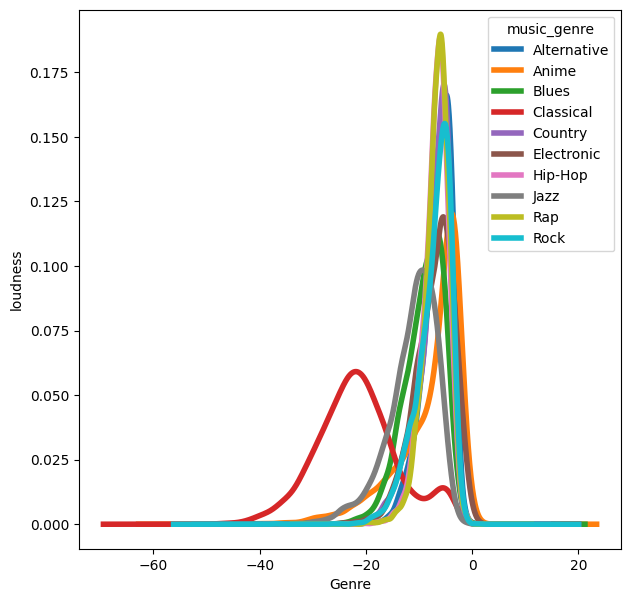

In [ ]:
# converting data into wide-format
data_wide = music.pivot(columns='music_genre',
                     values='loudness')

data_wide.plot.density(figsize = (7, 7),
                       linewidth = 4)
  
plt.xlabel("Genre")
plt.ylabel("loudness")

Text(0, 0.5, 'energy')

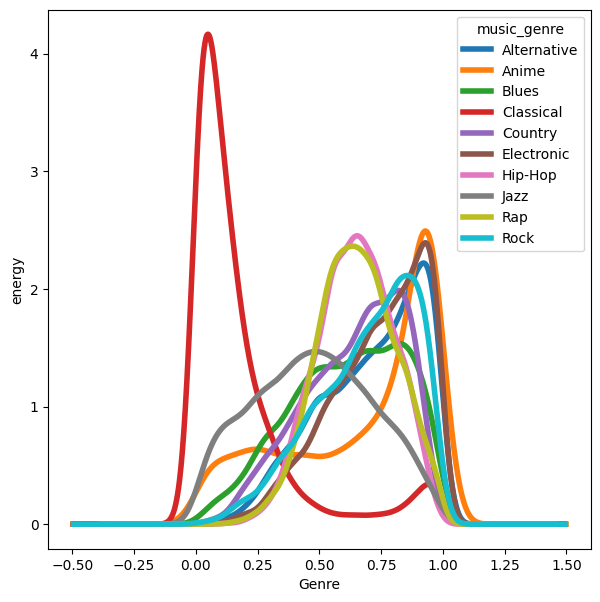

In [ ]:
# converting data into wide-format
data_wide = music.pivot(columns='music_genre',
                     values='energy')

data_wide.plot.density(figsize = (7, 7),
                       linewidth = 4)
  
plt.xlabel("Genre")
plt.ylabel("energy")

Text(0, 0.5, 'acousticness')

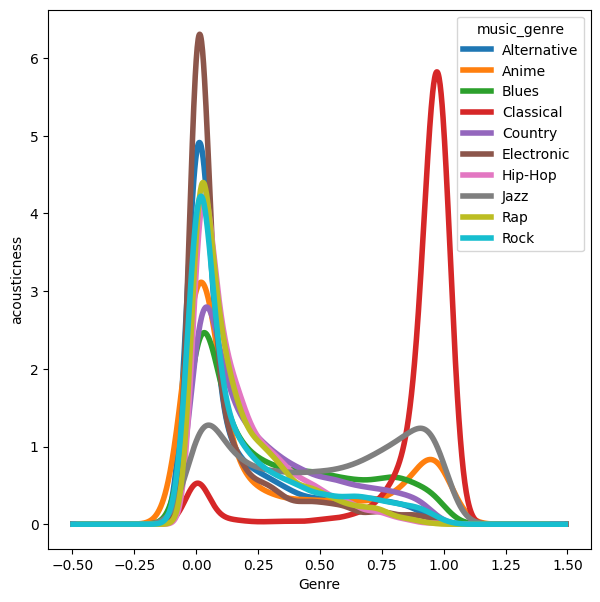

In [ ]:
# converting data into wide-format
data_wide = music.pivot(columns='music_genre',
                     values='acousticness')

data_wide.plot.density(figsize = (7, 7),
                       linewidth = 4)
  
plt.xlabel("Genre")
plt.ylabel("acousticness")

Text(0, 0.5, 'liveness')

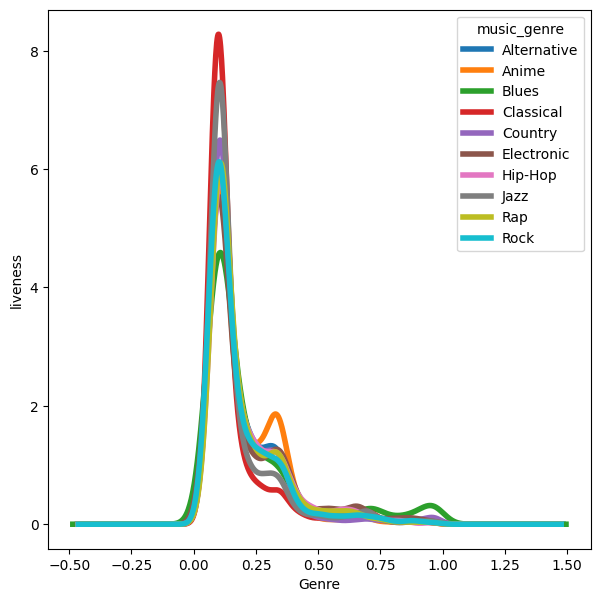

In [ ]:
# converting data into wide-format
data_wide = music.pivot(columns='music_genre',
                     values='liveness')

data_wide.plot.density(figsize = (7, 7),
                       linewidth = 4)
  
plt.xlabel("Genre")
plt.ylabel("liveness")

Text(0, 0.5, 'instrumentalness')

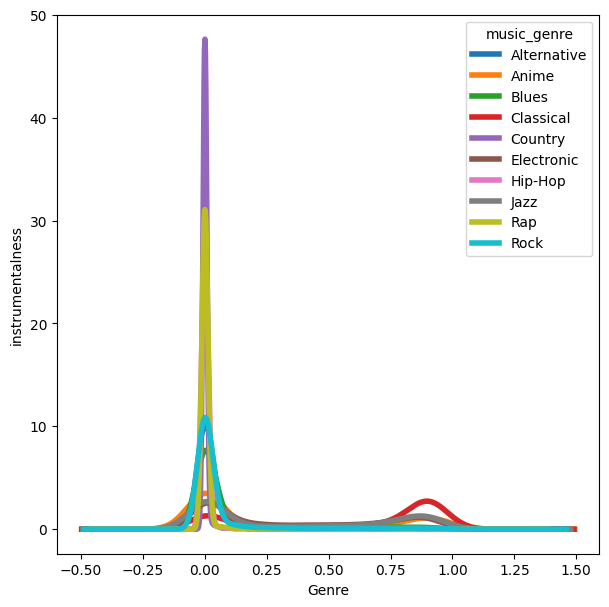

In [ ]:


# converting data into wide-format
data_wide = music.pivot(columns='music_genre',
                     values='instrumentalness')

data_wide.plot.density(figsize = (7, 7),
                       linewidth = 4)
  
plt.xlabel("Genre")
plt.ylabel("instrumentalness")



computing the correlation matrix 

In [ ]:
df = music.copy()      # copying the dataframe 
df["music_genre"] = Label_enc(df["music_genre"])    # converting the categorical data into numerical 
corr = df.corr()   # computing corelation

music_genre ['Alternative' 'Anime' 'Blues' 'Classical' 'Country' 'Electronic'
 'Hip-Hop' 'Jazz' 'Rap' 'Rock']


<Axes: >

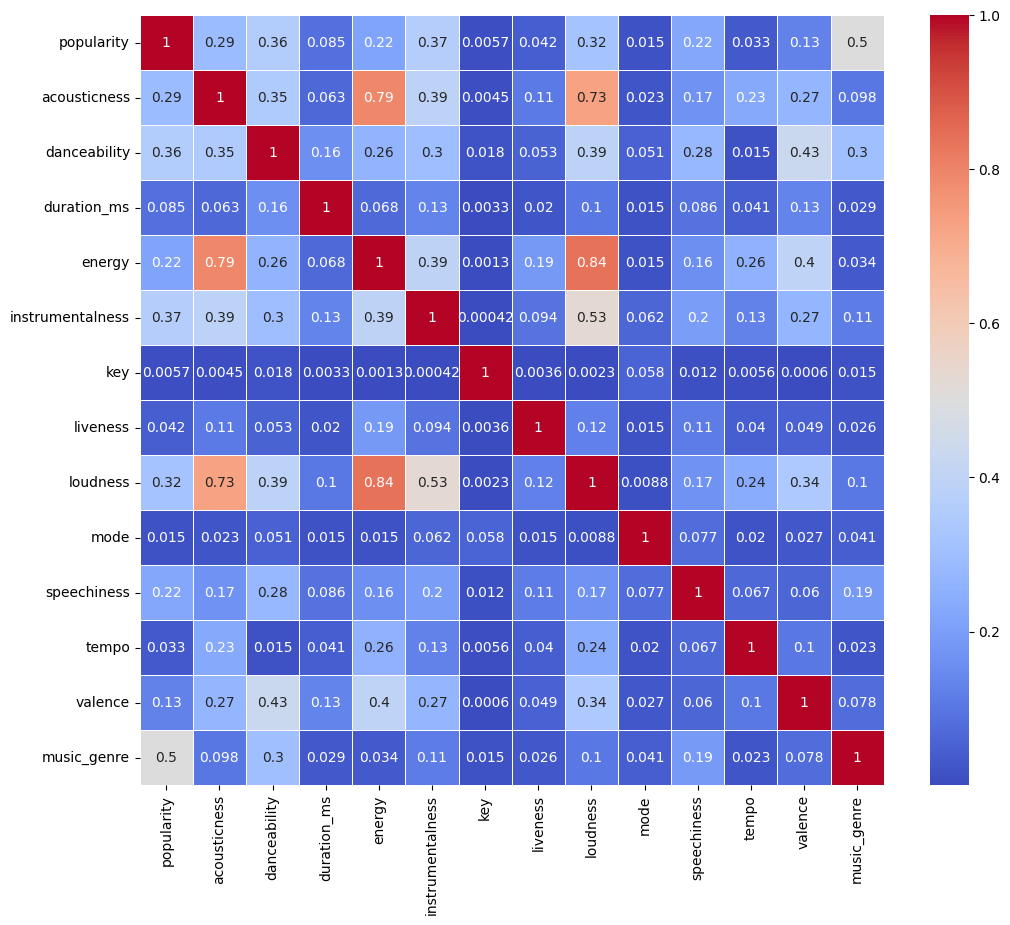

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(corr), annot=True, linewidths=.5,  cmap="coolwarm")

In [ ]:
print(abs(corr.music_genre).sort_values(ascending=False))    #  prints the absolute correlation coefficients between the "music_genre" column and all other columns

music_genre         1.000000
popularity          0.502620
danceability        0.302730
speechiness         0.188814
instrumentalness    0.110771
loudness            0.102907
acousticness        0.098186
valence             0.077881
mode                0.041013
energy              0.034433
duration_ms         0.029463
liveness            0.026354
tempo               0.022762
key                 0.014722
Name: music_genre, dtype: float64


Descision Tree

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
y = music["music_genre"]
X = music.drop(["music_genre"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)   # splitting the dataset

Descision Tree model

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
prediction = clf.predict(X_test)
accuracy_score(y_test,prediction)

0.4268103065304309

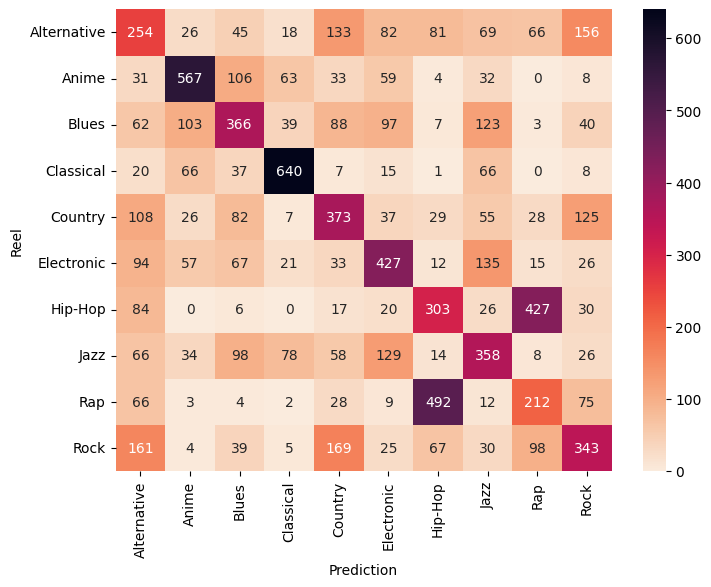

In [ ]:
plt.figure(figsize=(8,6))
cross = pd.crosstab(y_test,prediction, rownames = ["Reel"], colnames=["Prediction"])
sns.heatmap(cross, cmap='rocket_r', annot=True, fmt='g');

displaying the precision, recall, F1, and support scores for the model.

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

 Alternative       0.27      0.27      0.27       930
       Anime       0.64      0.63      0.63       903
       Blues       0.43      0.39      0.41       928
   Classical       0.73      0.74      0.74       860
     Country       0.40      0.43      0.41       870
  Electronic       0.47      0.48      0.48       887
     Hip-Hop       0.30      0.33      0.32       913
        Jazz       0.40      0.41      0.40       869
         Rap       0.25      0.23      0.24       903
        Rock       0.41      0.36      0.39       941

    accuracy                           0.43      9004
   macro avg       0.43      0.43      0.43      9004
weighted avg       0.43      0.43      0.43      9004



In [ ]:
scores = cross_val_score(clf, X, y, scoring="accuracy", cv = 10)
scores.mean()

0.4320746334962239

K Nearest neighbour

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

# fit the KNN model to the training data
knn.fit(X_train, y_train)

# make predictions on the test data
y_pred = knn.predict(X_test)

# compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.179253665037761


In [ ]:
# create an instance of the Gaussian Naive Bayes classifier
nb = GaussianNB()

# fit the Naive Bayes model to the training data
nb.fit(X_train, y_train)

# make predictions on the test data
y_pred = nb.predict(X_test)

# compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3757219013771657


Enhancing the accuracy

In [ ]:
music.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'music_genre'],
      dtype='object')

dimensionality reduction

In [ ]:
music = music.drop(["duration_ms", "instrumentalness"], axis=1)


Normalisation

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()
music_norm = pd.DataFrame(scaler.fit_transform(music.iloc[:,:-1]), columns=music.iloc[:,:-1].columns)  # minmax scaling data except genre(object) column

In [ ]:
music_norm = pd.concat([music_norm, music['music_genre']], axis=1)   # concatenating normalised data with genre

In [ ]:
music_norm.head()

,popularity,acousticness,danceability,energy,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,-1.109911,-0.884378,0.522585,1.290882,-1.257063,-0.488216,0.639344,-1.337276,-0.187086,-0.622164,1.224343,Electronic
1,-0.852739,-0.860885,0.354853,1.098070,-0.101296,-0.432561,0.340140,-1.337276,-0.628606,-0.161578,0.301856,Electronic
2,-1.045618,-0.889123,0.343671,0.587686,1.632353,2.102795,0.734206,0.747789,-0.584257,0.262424,-0.499252,Electronic
3,-0.659860,-0.823684,1.204697,0.379752,-0.390238,-0.228496,0.753536,0.747789,1.431165,0.263077,-0.754150,Electronic
4,-0.788446,-0.884466,0.444310,-0.047459,1.054470,-0.228496,0.466352,0.747789,-0.517241,0.818601,-0.539712,Electronic


In [ ]:
music_norm.shape

(49527, 12)

In [ ]:
print(music_norm.isna().sum())

popularity      4507
acousticness    4507
danceability    4507
energy          4507
key             4507
liveness        4507
loudness        4507
mode            4507
speechiness     4507
tempo           4507
valence         4507
music_genre     4507
dtype: int64


In [ ]:
music_norm = music_norm.dropna()

Removing overlapping classes

In [ ]:
music_norm = music_norm[~music_norm['music_genre'].str.contains('Rap')]
music_norm = music_norm[~music_norm['music_genre'].str.contains('Jazz')]


Analysing the final results

In [ ]:
y = music_norm["music_genre"]
X = music_norm.drop(["music_genre"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)   # splitting the dataset

Descision tree classifier

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
prediction = clf.predict(X_test)
accuracy_score(y_test,prediction)

0.3939345824071134

In [ ]:
scores = cross_val_score(clf, X, y, scoring="accuracy", cv = 10)
scores.mean()

0.3913527236616937

In [ ]:
knn = KNeighborsClassifier(n_neighbors=29)


knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5169895204826929


In [ ]:

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.44490314385519214
